# GENERAL OVERVIEW OF THE PROJECT


This project is for the ModECI outreachy internship prequisite, it is a tutorial on how to implement MDF with keras.It involves creating a model in keras that can be exported into MDF in order for it to be used with any MDF compartible tools. In this notebook, i will be taking you through a step-by-step tutorial on how i built a keras model using dataset containing 3 rows and 3 columns which was created from numpy arrays and was later converted to MDF. 


# REQUIREMENT

## Libraries

### The library used in this project are listed as follows:



1. Numpy: Numpy is a python library used for working with arrays. it also has functions for working in domain of linear algebra, fourier transform and matrices. it was used in this project to generate our dataset for building the keras model.



2. Tensorflow: Tensorflow is an end-end open source platform for machine learning. TensorFlow is a rich system for managing all aspects of a machine learning system. it only focuses on using a particular Tensorflow API to develop and train machine learning models. it was used in this project to import keras.


3. keras: keras is an open-source software library that provides a Python interface for Artificial Neural Networks. Keras acts as an interface for the TensorFlow library. 

4. save_model:This function accepts the model object and the file path and then save the model. if no file path is specified, then the model will be saved to the current working directory. After the model is saved, you can load it using the load_model fuction. it is used in this project to save the keras model.


5. layers: A layer in a deep learning model is a structure or network topology in the model's architecture, which takes information from the previous layers and then passes it to the next layer. it was used in this project to create layers of the model.


6. Activation: An activation function is a mathematical gate in between the input feeding the current neuron and its output going to the next layer. it can be as simple as a step function that turns the neuron output on and off, depending on the rule of threshold. it was used in this project for activating the layers of the the keras model.


7. Dense:Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. it is the layer of neurons in which each neuron receives input from all the neurons of previous layer thus called as dense. it is used in this project to specify number of neurons needed in each layer.


8. plot_model: The plot_model() is a generic plot-function which accepts ,many model-objects. it is used in this project to create plot of the network. it takes in two arguments which are the model you wish to plot(required) and the name of the file to which to save the plot.



# DATASET
The dataset used in this project was created from numpy arrays. it consist of three rows and three columns.

# WORKFLOW

1. I created dataset with numpy which consists of three rows and 3 columns..
2. I created a simple feedforward keras model, trained it using binary cross-entropy loss fuction and the accuracy metric was used to evaluate the performance of the model on the test set.
3. The keras model was saved to h5 and then imported to python script, and various functions to convert the keras model to MDF was implemented in this script.
4. Lastly, the keras model was finally converted to MDF with the aid of the previously created functions in the python script. The newly created MDF model was then saved in both json and yaml file format and the perfomance of the MDF model was evaluated and the graphical representation of the model was also generated. 

### Importing libraries

In [ ]:
# importing the libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import save_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation,Dense
from keras.utils import plot_model

### Create feature matrix and target vector

In [16]:
# creating the dataset
X=np.array(([1,1,1],[0,0,0],[0,1,0]), dtype=float)
y=np.array(([0],[1],[0]), dtype=float)

### Create a model

In [17]:
# building the model
model= tf.keras.Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

In [18]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# fitting the model
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.5762 - accuracy: 0.6667
Epoch 2/150
1/1 [==============================] - 0s 15ms/step - loss: 0.5743 - accuracy: 0.6667
Epoch 3/150
1/1 [==============================] - 0s 19ms/step - loss: 0.5724 - accuracy: 0.6667
Epoch 4/150
1/1 [==============================] - 0s 35ms/step - loss: 0.5704 - accuracy: 0.6667
Epoch 5/150
1/1 [==============================] - 0s 17ms/step - loss: 0.5685 - accuracy: 0.6667
Epoch 6/150
1/1 [==============================] - 0s 16ms/step - loss: 0.5666 - accuracy: 0.6667
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 0.5647 - accuracy: 0.6667
Epoch 8/150
1/1 [==============================] - 0s 25ms/step - loss: 0.5627 - accuracy: 0.6667
Epoch 9/150
1/1 [==============================] - 0s 12ms/step - loss: 0.5608 - accuracy: 0.6667
Epoch 10/150
1/1 [==============================] - 0s 20ms/step - loss: 0.5589 - accuracy: 0.6667
Epoch 11/150
1/1 [===

### Getting weight of model

In [31]:
# getting the weight of the model
print(model.get_weights())

[array([[ 0.20460442,  0.7481903 , -0.50947237, -0.5875372 , -0.24060747,
         0.35641867,  0.11797941,  0.68521076, -0.44253325,  0.11313052,
         0.23923866, -0.05161101],
       [-0.21836153,  0.6215303 , -0.5920715 , -0.45953822,  0.21446449,
        -0.10147703, -0.567256  ,  0.5810185 ,  0.40655395,  0.22924785,
         0.17659037,  0.2841003 ],
       [ 0.52039236,  0.43301114, -0.5867352 ,  0.29454416, -0.5498113 ,
        -0.47041976, -0.16164279,  0.38945967,  0.62997854,  0.2835683 ,
         0.27246788,  0.19517407]], dtype=float32), array([ 0.015307  ,  0.00734454,  0.        ,  0.        , -0.0001629 ,
        0.        ,  0.        , -0.0008799 ,  0.0387494 , -0.11667172,
       -0.09868469,  0.0065016 ], dtype=float32), array([[ 0.19142553,  0.30277604, -0.28667492, -0.10444027, -0.13383716,
        -0.15678217,  0.25282678,  0.11026579],
       [ 0.26152456, -0.08188996, -0.20236427, -0.26104978, -0.4234171 ,
         0.63230324,  0.21271008,  0.5027759 ],
   

### Evaluating the model

In [20]:
# Evaluating the model
accuracy= model.evaluate(X, y, verbose=0)
print('%s: %.2f%%' %(model.metrics_names[1], accuracy[1]*100))

accuracy: 100.00%


### Summarizing the model

In [21]:
#summarizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                48        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### Predicting with the model

In [22]:
# making predictions with the model
pred = model.predict(X).round()
pred

1/1 [==============================] - 0s 168ms/step


array([[0.],
       [1.],
       [0.]], dtype=float32)

In [23]:
predictions=(model.predict(X) > 0.5).astype(int)
predictions

1/1 [==============================] - 0s 38ms/step


array([[0],
       [1],
       [0]])

### Lopping through predictions to compare actual and expected

In [24]:
# comparing the actual and expected output of the predictions made by the model
for i in range(3):
    print('%s => %d (expected %d)' % (X[i]. tolist(), predictions[i], y[i]))

[1.0, 1.0, 1.0] => 0 (expected 0)
[0.0, 0.0, 0.0] => 1 (expected 1)
[0.0, 1.0, 0.0] => 0 (expected 0)


### Saving the model

In [25]:
#saving the model
save_model(model, 'model.h5')

# Plotting the graph of the model

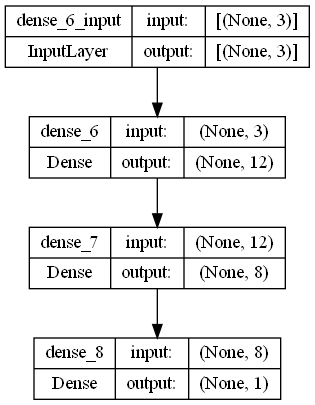

In [29]:
# generating the graph image of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)